# Домашнее задание 1

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as slmodel
import matplotlib.pyplot as plt
import statsmodels.api as sm

ModuleNotFoundError: No module named 'numpy'

In [2]:
table = pd.read_excel('RPL.xlsx', 'Лист1')
table.head()

,Место,Клуб,Матчи,Победы,Ничьи,Поражения,Забито,Пропущено,Разница,Очки
0,1,Спартак,30,16,10,4,51,30,21,58
1,2,Локомотив,30,16,9,5,53,22,31,57
2,3,Зенит,30,15,9,6,50,34,16,54
3,4,Торпедо,30,15,7,8,51,40,11,52
4,5,Крылья Советов,30,14,8,8,38,22,16,50


# Зависимость очков от забитых мячей

In [3]:
x = table['Забито'].values.reshape(-1, 1)
y = table.loc[:,'Очки'].values

In [4]:
model = slmodel.LinearRegression()
model.fit(x, y)
model.intercept_, model.coef_

(4.790171859179246, array([1.00390613]))

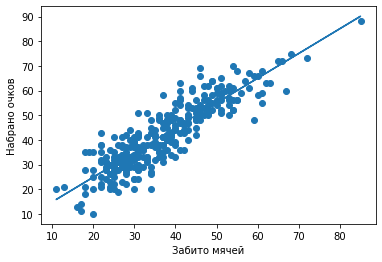

In [5]:
plt.scatter(table['Забито'], table['Очки'])
x1 = [model.coef_[0] * x + model.intercept_ for x in table['Забито'].values]
plt.plot([*table['Забито'].values], x1 , label = 'Прогнозная прямая')
plt.xlabel('Забито мячей')
plt.ylabel('Набрано очков')
plt.show()

# Зависимость от забитых и пропущенных

In [6]:
x = table[['Забито', 'Пропущено']].values
y = table.loc[:,'Очки'].values

In [7]:
model = slmodel.LinearRegression()
model.fit(x, y)
model.intercept_, model.coef_

(24.24550869862535, array([ 0.88421478, -0.40794739]))

In [8]:
x.shape

(304, 2)

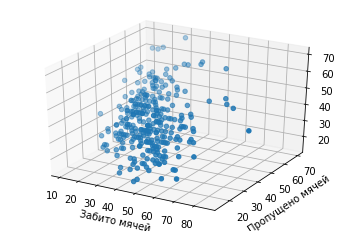

In [9]:
x = table['Забито'].values
y = table['Пропущено'].values
z = y
s = 20
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('Забито мячей')
plt.ylabel('Пропущено мячей')
#plt.zlabel('Набрано очков')
ax.scatter(x, y, z, s=s)

#ax = fig.add_subplot(111, projection='3d')
x1 = [model.coef_[0] * x[0] + model.coef_[0] * x[1] + model.intercept_ for x in table[['Забито', 'Пропущено']].values]
#ax.plot(x, x1, label='parametric curve')

# Домашнее задание 2

## Доверительный интервал для первого коэффициента

In [10]:
from math import sqrt
from scipy import stats

x = table[['Забито', 'Пропущено']].values
y = table.loc[:,'Очки'].values

model = slmodel.LinearRegression()
model.fit(x, y)
model.intercept_, model.coef_

t_c = stats.t.ppf(1-0.05/2, 302)
e = y - model.predict(x)
s_b2 = sqrt(np.transpose(e).dot(e)*(np.linalg.inv((np.transpose(x).dot(x)))[0,0])/302)
t_lower = model.coef_[0] - t_c*s_b2
t_upper = model.coef_[0] + t_c*s_b2
print(t_lower, t_upper)

0.8526031776629841 0.9158263808514648


## Проверка гипотезы, что один из коэффициентов равен нулю

In [11]:
model.coef_[0]/s_b2 - t_c > 0

True

Получаем, что на уровне значимости $\alpha = 0.05$ гипотезу отвергаем, так как выполнено неравенство $|t| = \frac{\hat{\beta}_{1}}{s_{\hat{\beta_1}}} > t_c$ 

## Доверительный интервал для $\sigma^2$

In [12]:
s2 = np.transpose(e).dot(e)/302
t_upper = 302*s2/stats.chi2.ppf(0.05/2, 302)
t_lower = 302*s2/stats.chi2.ppf(1-0.95/2, 302)
print(t_lower, t_upper)

24.024256668860865 28.450770658979412


# Задача 3.5

# Домашнее задание 1

In [13]:
zadacha = {
    "S":pd.Series([3, 6, 5, 3.5, 1.5]),
    "Y":pd.Series([40, 55, 45, 30, 30]),
    "W":pd.Series([60, 36, 36, 15, 90])
}
zad = pd.DataFrame(zadacha)
zad

,S,Y,W
0,3.0,40,60
1,6.0,55,36
2,5.0,45,36
3,3.5,30,15
4,1.5,30,90


In [14]:
x = zad.iloc[:,1:]
y = zad.iloc[:,0]

model_zad = slmodel.LinearRegression()
model_zad.fit(x, y)
model_zad.intercept_, model_zad.coef_

(0.2787386557937661, array([ 0.12287913, -0.02940725]))

In [15]:
a = 40
b = 25
print('Прогноз б пункта:', model_zad.coef_[0]*a + model_zad.coef_[1]*b + model_zad.intercept_)

Прогноз б пункта: 4.45872243412688


In [16]:
delta = 10 
print('Оценка пунтка в:', model_zad.coef_[0]*delta)

Оценка пунтка в: 1.2287912666052874


In [17]:
delta1 = 5
delta2 = 15
print('Оцеонка г пункта:', model_zad.coef_[0]*delta1 + model_zad.coef_[1]*delta2)

Оцеонка г пункта: 0.17328686044982222


## Последний пункт

In [18]:
zad['model'] = model_zad.coef_[0]*zad.Y + model_zad.coef_[1]*zad.W + model_zad.intercept_
zad['error'] = zad.S - zad.model
zad

,S,Y,W,model,error
0,3.0,40,60,3.429469,-0.429469
1,6.0,55,36,5.978430,0.021570
2,5.0,45,36,4.749638,0.250362
3,3.5,30,15,3.524004,-0.024004
4,1.5,30,90,1.318460,0.181540


In [19]:
import statistics

In [20]:
statistics.variance(zad.error)

0.07028064579771125

In [21]:
((zad.error)**2).mean()

0.056224516638169006

# Домашнее задание 2

In [22]:
zadacha = {
    "S":pd.Series([3, 6, 5, 3.5, 1.5]),
    "Y":pd.Series([40, 55, 45, 30, 30]),
    "W":pd.Series([60, 36, 36, 15, 90])
}
zad = pd.DataFrame(zadacha)

x = zad.iloc[:,1:]
y = zad.iloc[:,0]

In [23]:
def mat(H, x, beta): 
    return H.T@np.linalg.inv((H@np.linalg.inv((x.T@x))@H.T))@H

## Пункт а

### Пункт 1)

In [24]:
H = np.array([[1, 0], [0, 1]])
x = zad.iloc[:,1:]
model.fit(x, y)

A = mat(H, x, model.coef_)
e = y - model.predict(x)
c = (e.T@e)*2/3
print(c, ",",A)

0.18741505546056336 , [[ 8450.  9150.]
 [ 9150. 14517.]]


$(\hat{\beta} - \beta)'A (\hat{\beta} - \beta) \in [0; 19.16\cdot c],$, где $19.16$ - квантиль уровня $0.05$ у $F_{2,3}$.

### Пункт 2)

In [25]:
H = np.array([[ 1, 0]])
x = zad.iloc[:,1:]
model.fit(x, y)

LinearRegression()

In [26]:
A = mat(H, x, model.coef_)
e = y - model.predict(x)
c = (e.T@e)*1/3
print(c, ",",A)


t_upper = model.coef_[1] + sqrt(216)*c/A[0,0]
t_lower = model.coef_[1] - sqrt(216)*c/A[0,0]
print("Интеравл: ",t_lower, t_upper)

0.09370752773028168 , [[2682.79603224    0.        ]
 [   0.            0.        ]]
Интеравл:  -0.029920601681875606 -0.028893901365167254


In [27]:
model.coef_[1]

-0.02940725152352143

### Пункт 3)

In [28]:
H = np.array([[ 0, 1]])
x = zad.iloc[:,1:]
model.fit(x, y)

LinearRegression()

In [29]:
A = mat(H, x, model.coef_)
e = y - model.predict(x)
c = (e.T@e)*1/3
print(c, ",",A)


t_upper = model.coef_[1] + sqrt(216)*c/A[1,1]
t_lower = model.coef_[1] - sqrt(216)*c/A[1,1]
print("Интеравл: ",t_lower, t_upper)

0.09370752773028168 , [[   0.            0.        ]
 [   0.         4609.01183432]]
Интеравл:  -0.029706060426055895 -0.029108442620986965


### Пункт 4)

In [30]:
H = np.array([[1, 0, 0], [0, 1, 0]])
a = np.array([[1], [1], [1], [1], [1]])
x = zad.iloc[:,1:]
x = np.hstack((a, x))
model.fit(x, y)

LinearRegression()

In [31]:
A = mat(H, x, model.coef_)
e = y - model.predict(x)
c = (e.T@e)*2/3
print(c, ",",A)

0.18741505546056414 , [[1.13081215e+00 5.06199628e+01 0.00000000e+00]
 [5.06199628e+01 2.68279603e+03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


$(\hat{\beta} - \beta)'A (\hat{\beta} - \beta) \in [0; 19.16\cdot c],$, где $19.16$ - квантиль уровня $0.05$ у $F_{2,3}$.

## Пункт б

### Пункт 1)

In [32]:
H = np.array([[ 1, 0], [ 0, 1]])
x = zad.iloc[:,1:]
model.fit(x, y)
A = mat(H, x, model.coef_)
e = y - model.predict(x)
c = (e.T@e)*2/3
print(c, ',', A)

print(model.coef_.T@A@model.coef_, 216*c)

0.18741505546056336 , [[ 8450.  9150.]
 [ 9150. 14517.]]
74.01528468781467 40.48165197948168


Гипотеза отвергается на уровне значимости $\alpha = 0.05$.

### Пункт 2)

In [33]:
H = np.array([[ 0, 1]])
x = zad.iloc[:,1:]
model.fit(x, y)
A = mat(H, x, model.coef_)
e = y - model.predict(x)
c = (e.T@e)*1/3
print(c, ',', A)

print(model.coef_.T@A@model.coef_, 216*c)

0.09370752773028168 , [[   0.            0.        ]
 [   0.         4609.01183432]]
3.985810946109794 20.24082598974084


Гипотеза не противоречит

### Пункт 3)

In [34]:
H = np.array([[ 1, 0]])
x = zad.iloc[:,1:]
model.fit(x, y)
A = mat(H, x, model.coef_)
e = y - model.predict(x)
c = (e.T@e)*1/3
print(c, ',', A)

print(model.coef_.T@A@model.coef_, 216*c)

0.09370752773028168 , [[2682.79603224    0.        ]
 [   0.            0.        ]]
40.50828785353473 20.24082598974084


### Пункт 4)

In [35]:
H = np.array([[ 1, 0]])
x = zad.iloc[:,1:]
model.fit(x, y)
A = mat(H, x, model.coef_)
e = y - model.predict(x)
c = (e.T@e)*1/3
print(c, ',', A)

coef = model.coef_ - [1, 0]

print(coef.T@A@coef, 216*c)

0.09370752773028168 , [[2682.79603224    0.        ]
 [   0.            0.        ]]
2063.98505319211 20.24082598974084


Гипотеза отвергается на уровне значимости $\alpha = 0.05$.

### Пункт 5)

In [36]:
H = np.array([[1, 0]])
x = zad.iloc[:,1:]
model.fit(x, y)
A = mat(H, x, model.coef_)
e = y - model.predict(x)
c = (e.T@e)*1/3
print(c, ',', A)

coef = model.coef_ - [1.57, 0]

print(coef.T@A@coef, 216*c)

0.09370752773028168 , [[2682.79603224    0.        ]
 [   0.            0.        ]]
5618.200978684944 20.24082598974084


Гипотеза отвергается на уровне значимости $\alpha = 0.05$.

### Пункт 6)

In [37]:
H = np.array([[ 1, -5]])
x = zad.iloc[:,1:]
model.fit(x, y)
A = mat(H, x, model.coef_)
e = y - model.predict(x)
c = (e.T@e)*1/3
print(c, ',', A)

0.09370752773028168 , [[ 122.75512423 -613.77562116]
 [-613.77562116 3068.87810582]]


Найдем значение, которое дает минимум выражения $(\hat{\beta} - \beta)'A (\hat{\beta} - \beta)$.

In [38]:
x = (-model.coef_[0]*(A[0,0]+A[1,0]) - model.coef_[1]*(A[0,1]+A[1,1]))/((A[0,0]+A[1,0]) -5*(A[0,1]+A[1,1]))
coef = model.coef_ - [ x, -5*x]
print(coef.T@A@coef, 19.16*c)

35.7729617928818 1.795436231312197


Даже при минимизированой статистике, гипотеза отвергается на уровне значимости $\alpha = 0.05$.

## Пункт в)

In [39]:
x = zad.iloc[:,1:]
y = zad.iloc[:,0]
model.fit(x, y)

print(model.intercept_ + model.coef_[0]*30 + model.coef_[1]*52.5)

2.4212317506247536


In [40]:
print('Поскольку модель линейная, то при построении кф по 4 и 5 семье, получаем среднее арифмитическое.')

t_upper = model.intercept_ + model.coef_[0]*30 + model.coef_[1]*52.5+1.95
t_lower = model.intercept_ + model.coef_[0]*30 + model.coef_[1]*52.5-1.95
print(t_lower, t_upper)

Поскольку модель линейная, то при построении кф по 4 и 5 семье, получаем среднее арифмитическое.
0.47123175062475364 4.371231750624753
